## 1. EDA

In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [3]:
wine = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/PCA/wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


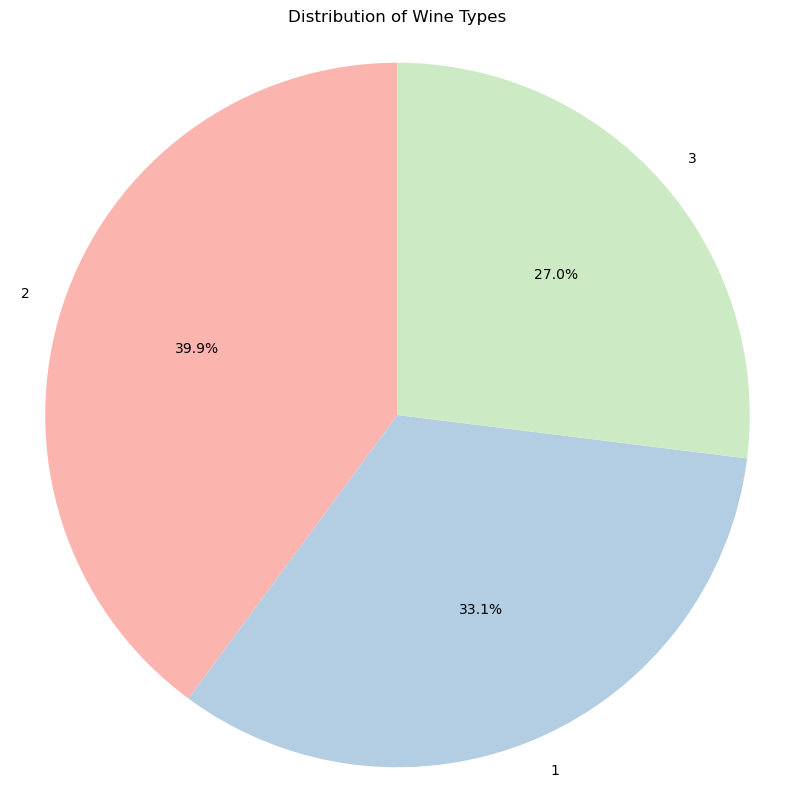

In [5]:
type_counts = wine['Type'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Wine Types')
plt.axis('equal')  # Makes the pie circular
plt.show()

Plot density plot for above data frame

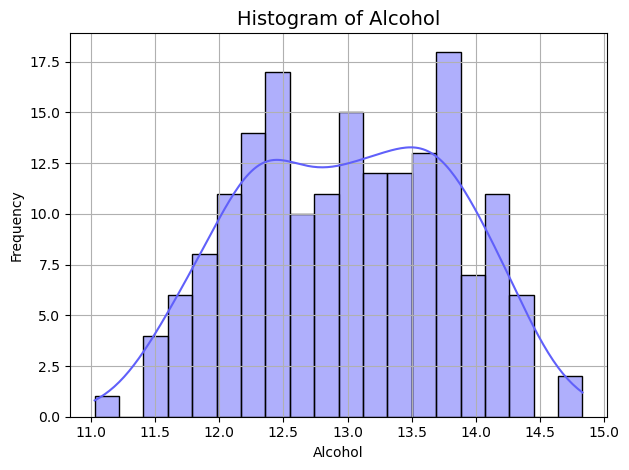

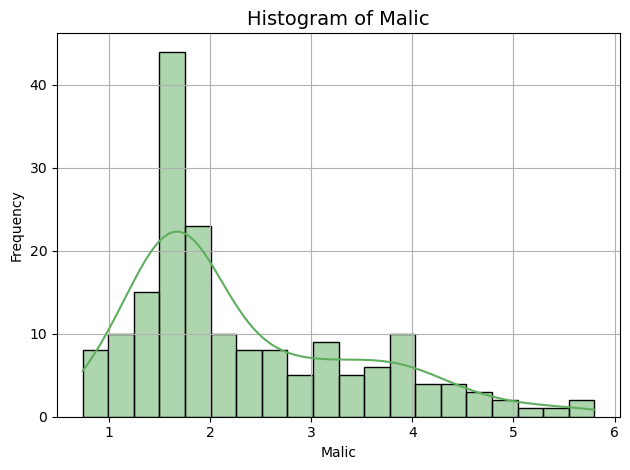

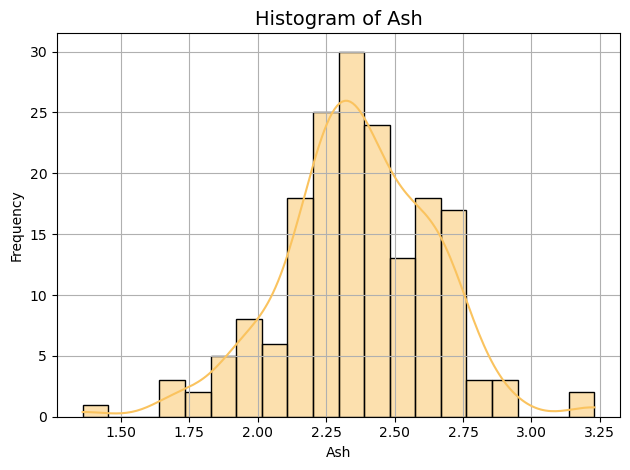

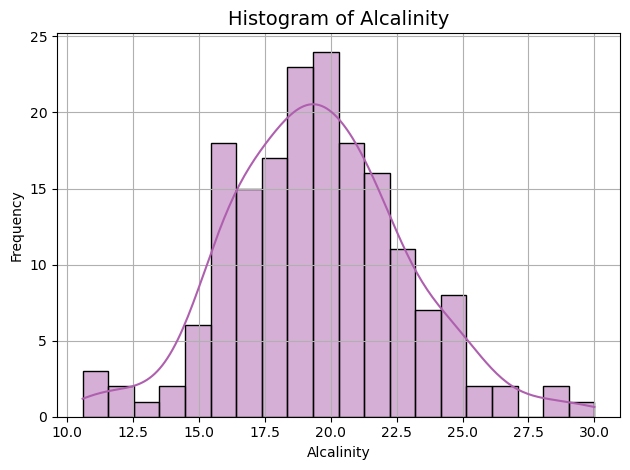

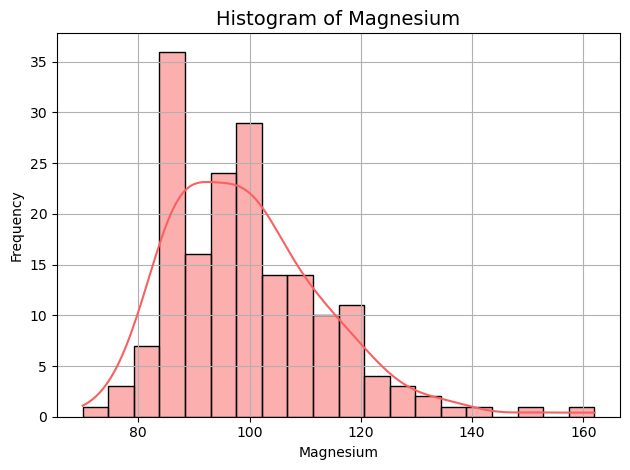

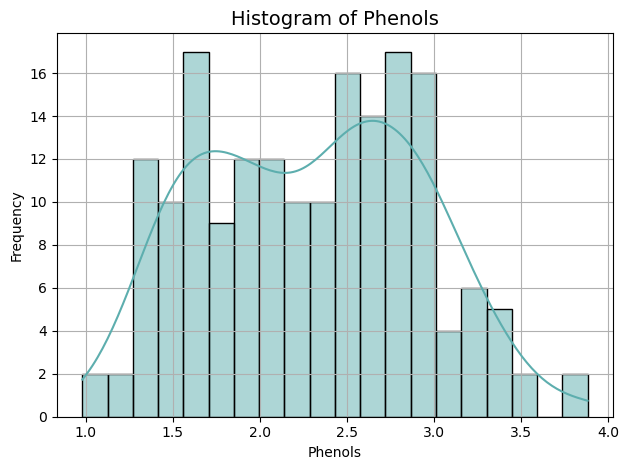

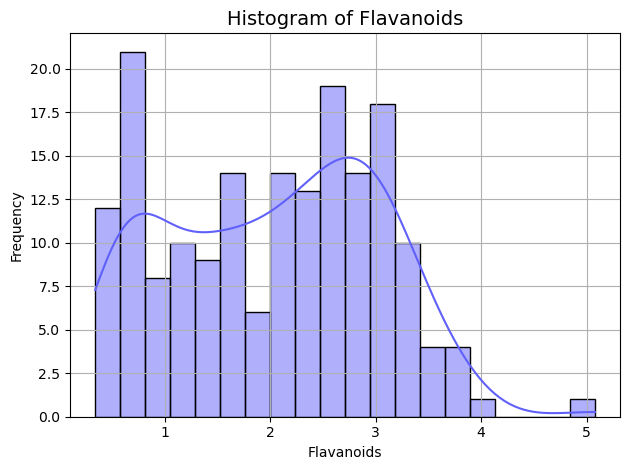

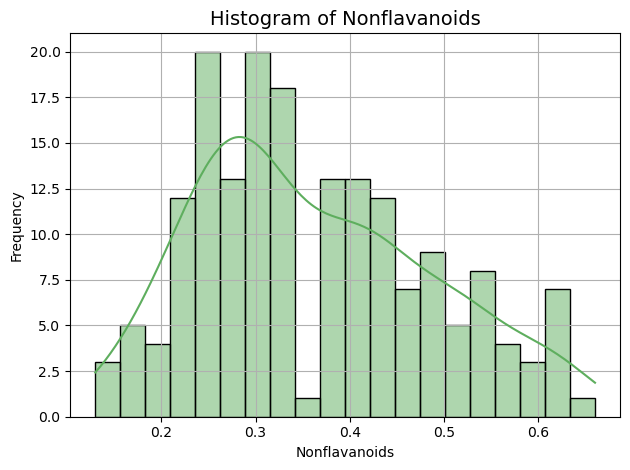

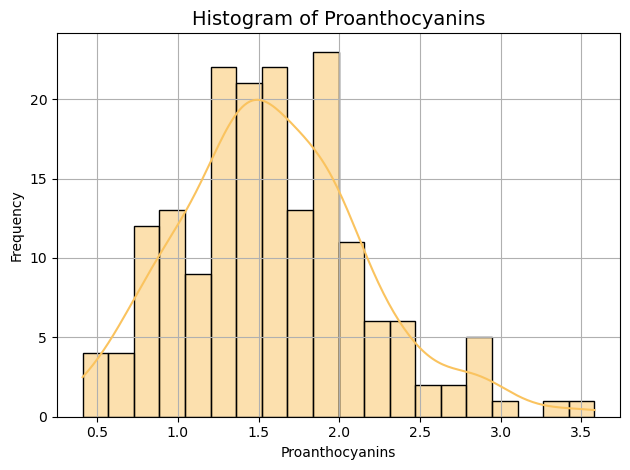

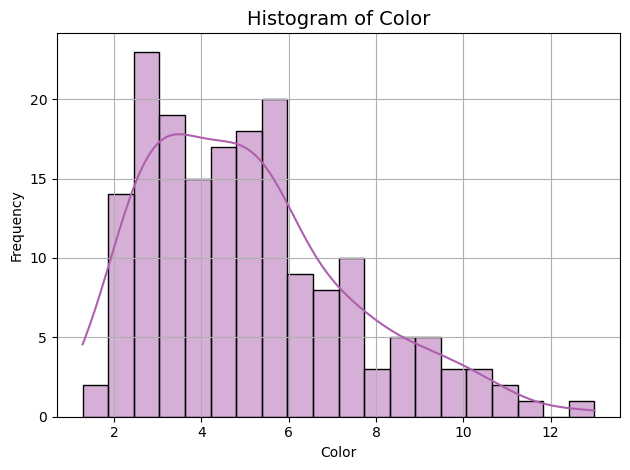

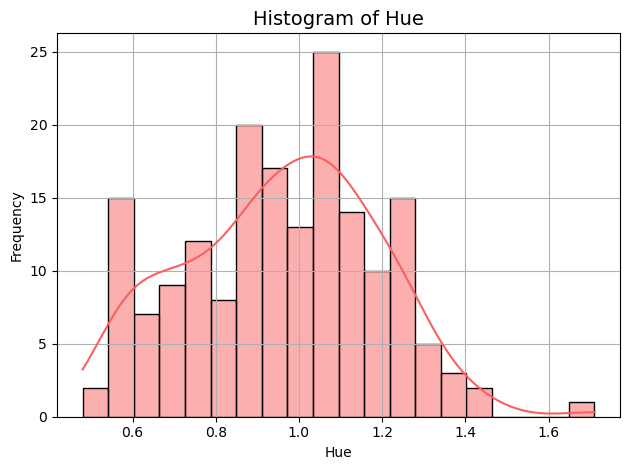

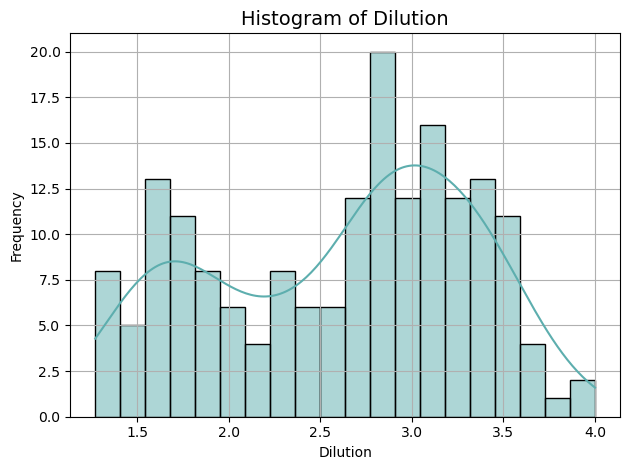

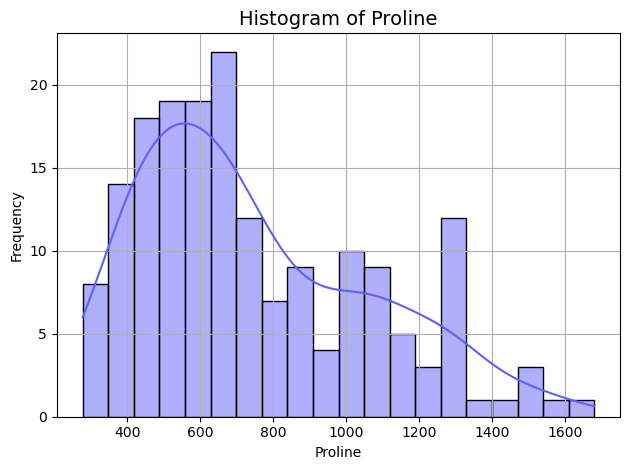

In [31]:
# Select numeric columns only
numeric_cols = wine.drop('Type', axis=1).columns

# Define a base color palette (e.g., light blue shades)
base_colors = ['blue', 'green', 'orange', 'purple', 'red', 'teal']

# Loop through each column and assign a light color
for i, col in enumerate(numeric_cols):
    light_color = sns.light_palette(base_colors[i % len(base_colors)], as_cmap=False)[3]  # pick a middle tone
    #plt.figure(figsize=(40, 20))
    sns.histplot(data=wine, x=col, bins=20, kde=True, color=light_color)
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlations between features of Wine data frame

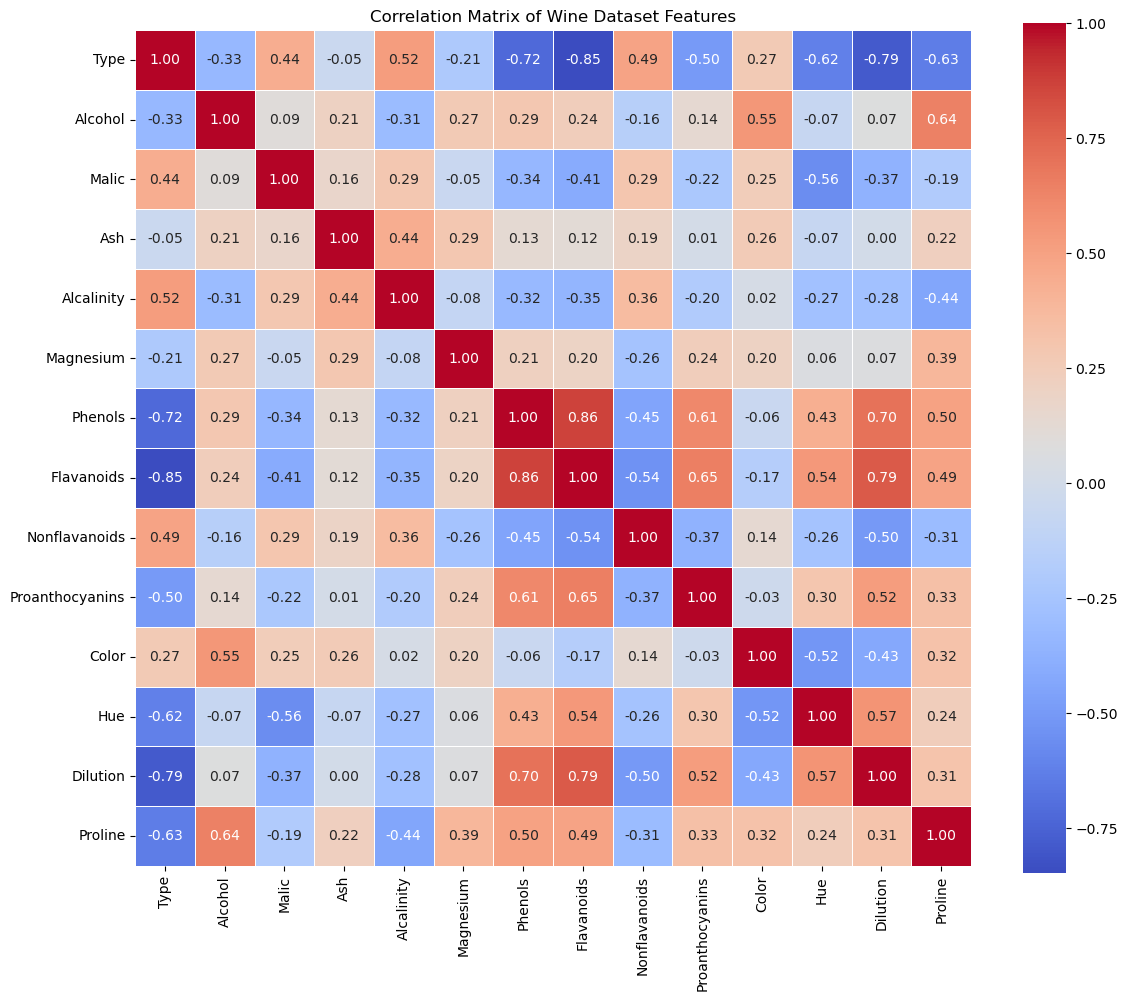

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine.corr(), 
            annot=True,        # display correlation coefficients
            cmap='coolwarm',   # color palette
            fmt=".2f",         # number format
            linewidths=0.5,    # line between cells
            square=True)       # square heatmap cells
plt.title("Correlation Matrix of Wine Dataset Features")
plt.tight_layout()
plt.show()

## 2. Dimensionality Reduction with PCA

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.drop('Type', axis=1))

In [14]:
wine_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
pca = PCA()
pca_values = pca.fit_transform(wine_std)
pca_values

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

The amount of variance that each PCA explains is 

In [16]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Cumulative variance 

In [17]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [18]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

Variance plot for PCA components obtained 

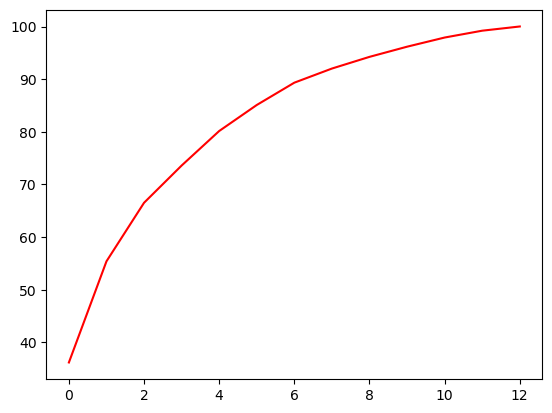

In [19]:
plt.plot(var1,color="red")

Scree  plot

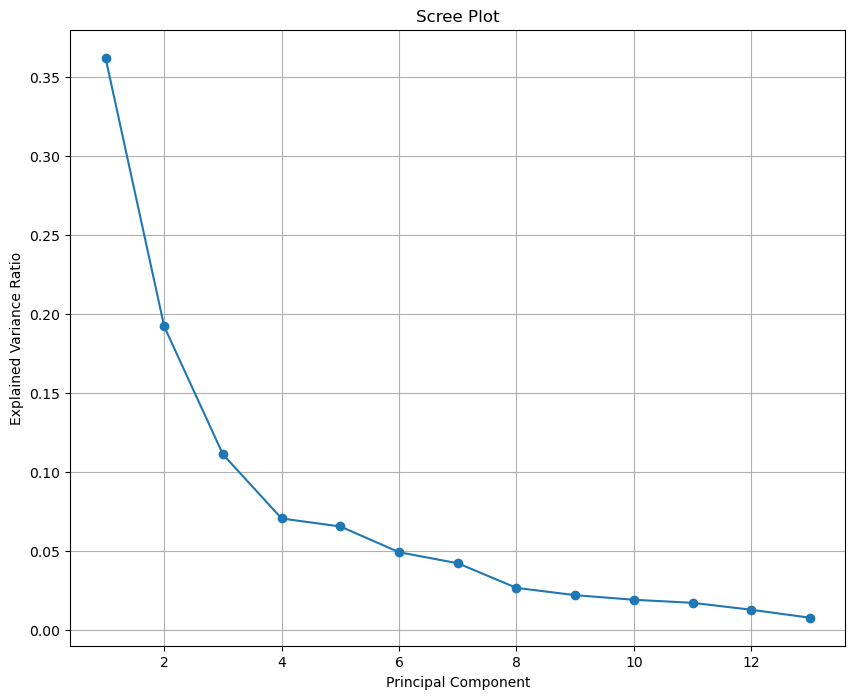

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

Cumulative plot

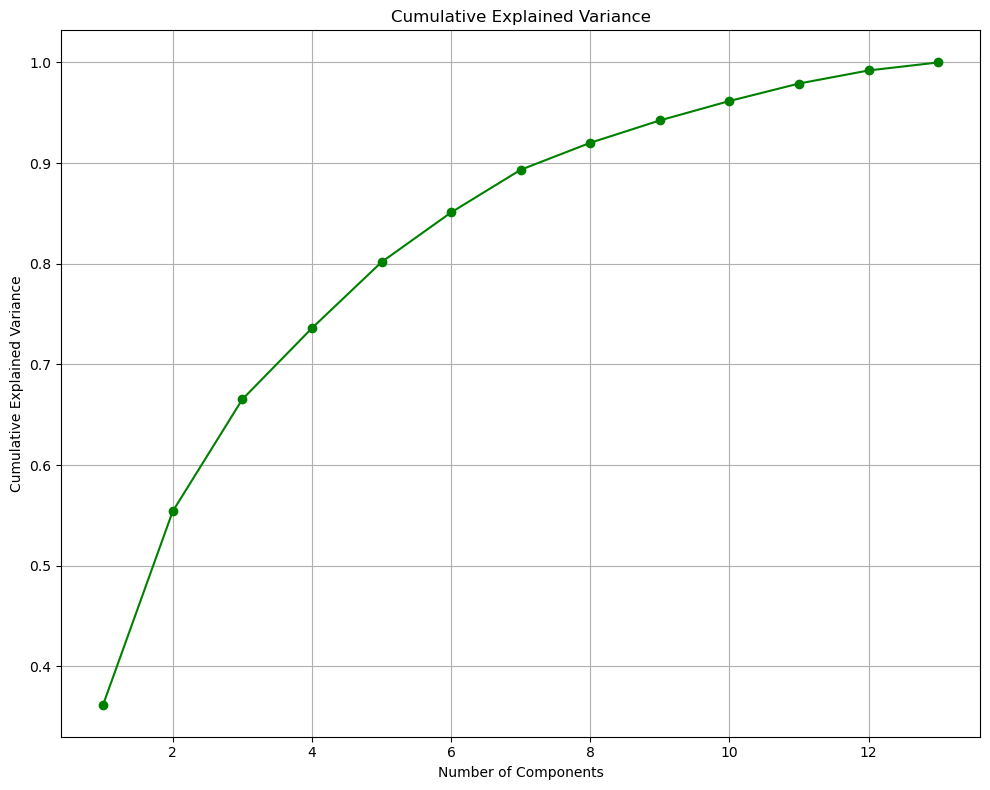

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

Extracting 4 components

In [33]:
pca_opt = PCA(n_components=4)
X_pca = pca_opt.fit_transform(wine_std)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Type'] = wine['Type']

## Clustering with Original Data
Clustering using KMeans

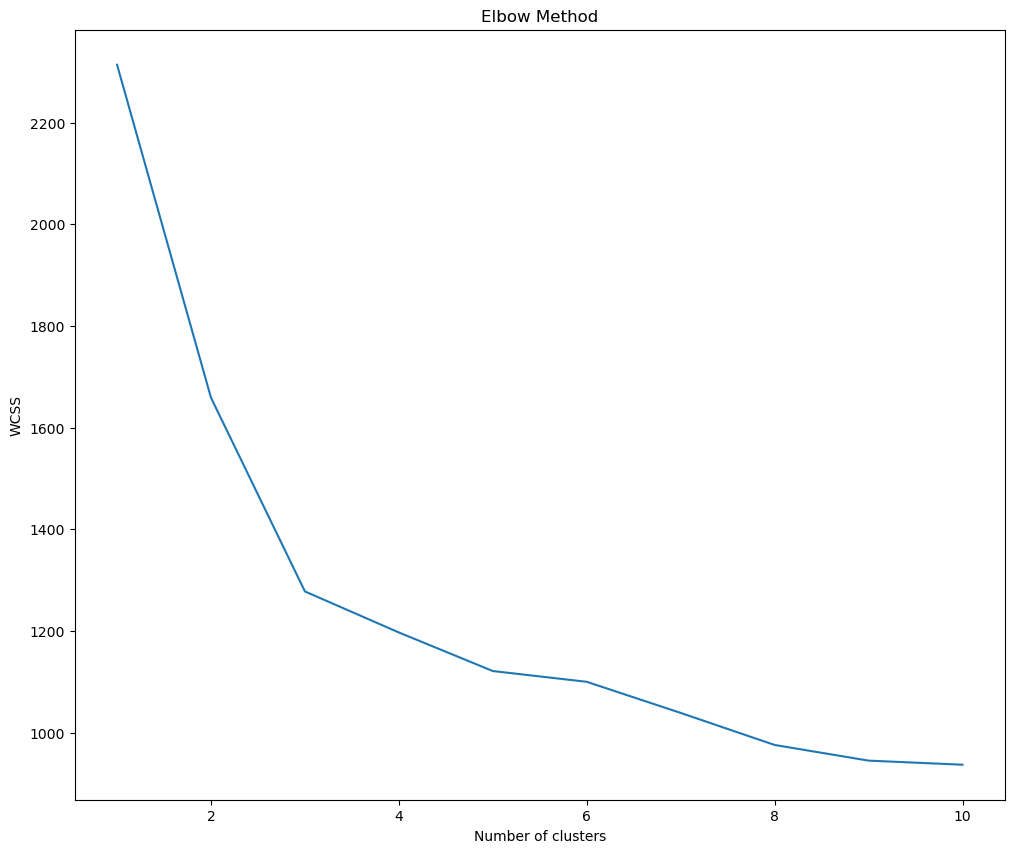

In [37]:
from sklearn.cluster import KMeans
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K=4

In [38]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(wine_std)

KMeans(n_clusters=4, random_state=42)

In [39]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 0, 3, 3,
       0, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [40]:
wine['clusterid_new'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.62401069, -0.73117368, -1.26663723, -0.70824623,  0.70112933,
         0.82793404,  0.61497833, -1.01117647,  1.38257156, -0.4124747 ,
         0.50576291,  0.38411519,  0.07937326],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.90055411, -0.2810336 ,  0.45452415, -0.57937785,  0.54474508,
         0.90651861,  0.99223692, -0.54564241,  0.522842  ,  0.19548275,
         0.46807856,  0.80539065,  1.14763614],
       [-0.92721209, -0.34665587, -0.37864148,  0.25261868, -0.6113539 ,
        -0.20240533, -0.04029092,  0.09898208, -0.09944995, -0.94515954,
         0.4602116 ,  0.25819083, -0.80473304]])

In [41]:
wine.groupby('clusterid_new')[wine.select_dtypes(include='number').columns].agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.727273,12.495455,1.521818,2.020000,17.136364,109.727273,2.811818,2.641818,0.236364,2.380000,4.104545,1.072727,2.883636,771.818182,0.0
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.0
2,2,1.034483,13.729655,2.023276,2.490862,17.565517,107.500000,2.860862,3.017586,0.294138,1.889310,5.510000,1.064138,3.181897,1107.275862,2.0
3,3,2.000000,12.250000,1.950172,2.262931,20.336207,91.034483,2.168793,1.989138,0.374138,1.534138,2.873103,1.062345,2.794483,494.189655,3.0


In [42]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


Silhouette score

In [44]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(wine_std, clusters_new.labels_)
print("KMeans Silhouette Score:", score_kmeans)

KMeans Silhouette Score: 0.2542275831600777


Davies-Bouldin index

In [48]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(wine_std, clusters_new.labels_)
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Davies-Bouldin Index: 1.695


As this DBI is >1.0 hence we will try KMeans with K=3

In [68]:
clusters_new = KMeans(3, random_state=100)
clusters_new.fit(wine_std)

KMeans(n_clusters=3, random_state=100)

In [69]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [70]:
wine['clusterid_new'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [71]:
wine.groupby('clusterid_new')[wine.select_dtypes(include='number').columns].agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848,0.0
1,1,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,1.0
2,2,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,2.0


In [72]:
score_kmeans = silhouette_score(wine_std, clusters_new.labels_)
print("KMeans Silhouette Score:", score_kmeans)

KMeans Silhouette Score: 0.28594199657074876


In [73]:
dbi_score = davies_bouldin_score(wine_std, clusters_new.labels_)
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Davies-Bouldin Index: 1.392


We will plot KMeans plot in the PCA dataset

## Clustering with PCA Data
Clustering on PCA dataset using KMeans

In [74]:
pca_df

,PC1,PC2,PC3,PC4,Type
0,3.316751,1.443463,-0.165739,-0.215631,1
1,2.209465,-0.333393,-2.026457,-0.291358,1
2,2.516740,1.031151,0.982819,0.724902,1
3,3.757066,2.756372,-0.176192,0.567983,1
4,1.008908,0.869831,2.026688,-0.409766,1
...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,3
174,-2.601956,1.757229,0.207581,0.349496,3
175,-2.677839,2.760899,-0.940942,0.312035,3
176,-2.387017,2.297347,-0.550696,-0.688285,3


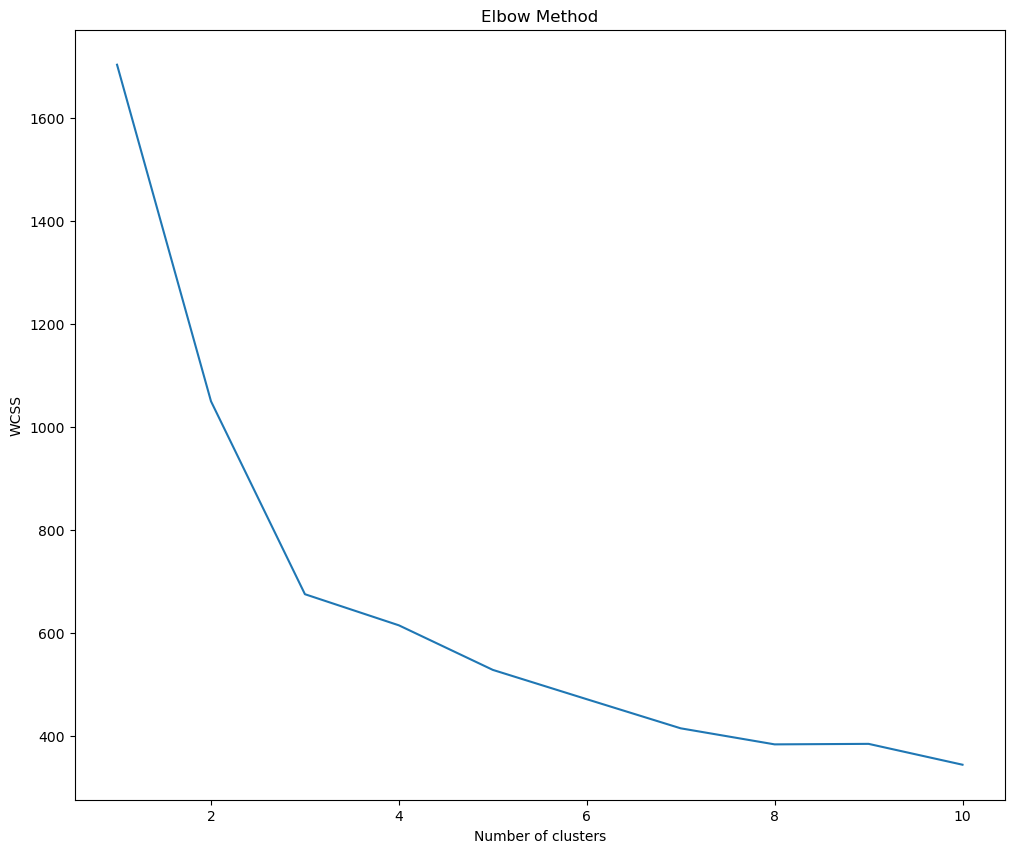

In [75]:
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df.drop('Type', axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(pca_df.drop('Type', axis=1))

KMeans(n_clusters=3, random_state=42)

In [77]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [78]:
pca_df['clusterid_new'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-3.69566084e-02, -1.77223945e+00,  1.86138728e-01,
         8.02397126e-02],
       [-2.72003575e+00,  1.12565126e+00, -2.39093241e-01,
         6.24569372e-02],
       [ 2.27619360e+00,  9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01]])

In [79]:
pca_df.groupby('clusterid_new')[pca_df.select_dtypes(include='number').columns].agg(['mean']).reset_index()

,clusterid_new,PC1,PC2,PC3,PC4,Type,clusterid_new
,,mean,mean,mean,mean,mean,mean
0,0,-0.036957,-1.772239,0.186139,0.080240,2.000000,0.0
1,1,-2.720036,1.125651,-0.239093,0.062457,2.941176,1.0
2,2,2.276194,0.932054,0.001528,-0.135498,1.048387,2.0


In [80]:
score_kmeans = silhouette_score(pca_df, clusters_new.labels_)
print("KMeans Silhouette Score:", score_kmeans)

KMeans Silhouette Score: 0.45990224018231046


In [81]:
dbi_score = davies_bouldin_score(pca_df, clusters_new.labels_)
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Davies-Bouldin Index: 0.871


Visualization using 3D graph

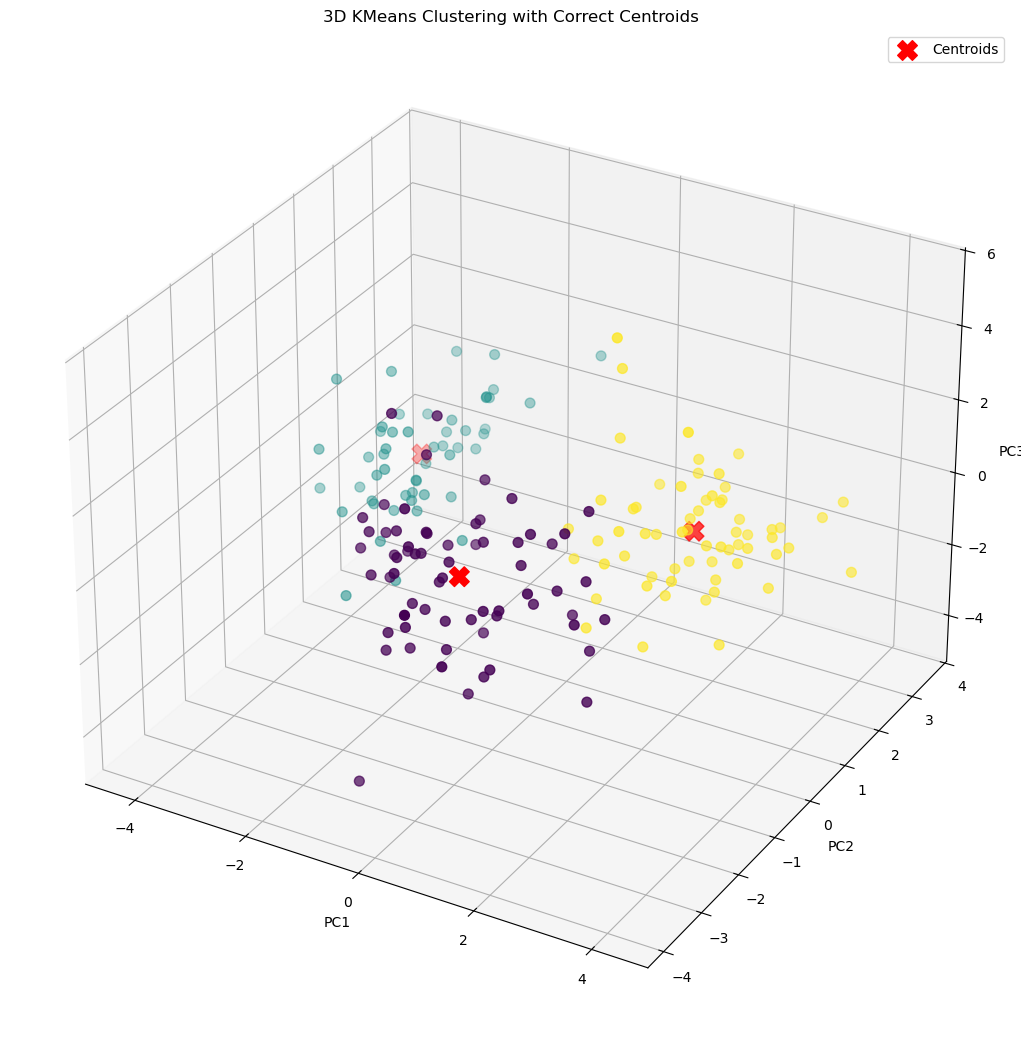

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare 3D PCA data
X = pca_df[['PC1', 'PC2', 'PC3']]

# Fit KMeans on this data
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 3D plot
fig = plt.figure(figsize=(18, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot colored by labels
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],
                     c=labels, cmap='viridis', s=50)

# Plot centroids (only one per cluster!)
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', marker='X', s=200, label='Centroids')

# Axis labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D KMeans Clustering with Correct Centroids")
plt.legend()
plt.show()


## Comparison and Analysis